In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

%matplotlib inline

## Apple, Google, Tesla Returns

In [2]:
# Read in the Apple historical data
data_path = Path("Apple_AAPL.csv")
aapl_df = pd.read_csv(data_path, index_col="Date",infer_datetime_format=True,parse_dates=True)
aapl_df.sort_index(inplace=True)

data_path = Path("Google_GOOG.csv")
goog_data = pd.read_csv(data_path, index_col="Date",infer_datetime_format=True,parse_dates=True)
goog_data.sort_index(inplace=True)

data_path = Path("Tesla_TLSA.csv")
tsla_data = pd.read_csv(data_path, index_col="Date",infer_datetime_format=True,parse_dates=True)
tsla_data.sort_index(inplace=True)
# Display sample data
aapl_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2016-10-25,$29.56,187282400,$29.49,$29.59,$29.33
2016-10-26,$28.90,264114560,$28.58,$28.93,$28.33
2016-10-27,$28.62,125584520,$28.85,$28.97,$28.53
2016-10-28,$28.43,147168400,$28.47,$28.80,$28.36
2016-10-31,$28.39,105515640,$28.41,$28.56,$28.30


In [3]:
# Check data types
aapl_df.dtypes
goog_data.dtypes
tsla_data.dtypes

Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [4]:
# Drop columns
aapl_df.drop(columns=["Volume", "Open", "High", "Low"], inplace=True)
aapl_df.head()

,Close/Last
Date,
2016-10-25,$29.56
2016-10-26,$28.90
2016-10-27,$28.62
2016-10-28,$28.43
2016-10-31,$28.39


In [5]:
# Fix data types
aapl_df["Close/Last"] = aapl_df["Close/Last"].str.replace("$", "")
aapl_df["Close/Last"] = aapl_df["Close/Last"].astype("float")

aapl_df.dtypes

Close/Last    float64
dtype: object

In [6]:
# Calculate daily returns
aapl_df = aapl_df.pct_change()
aapl_df.head()

,Close/Last
Date,
2016-10-25,NaN
2016-10-26,-0.022327
2016-10-27,-0.009689
2016-10-28,-0.006639
2016-10-31,-0.001407


In [7]:
# Drop nulls
aapl_df.pct_change()
aapl_df.dropna(inplace=True)
aapl_df.head()

,Close/Last
Date,
2016-10-26,-0.022327
2016-10-27,-0.009689
2016-10-28,-0.006639
2016-10-31,-0.001407
2016-11-01,-0.018316


In [8]:
# Rename `Close` Column to be specific to this portfolio
aapl_df = aapl_df.rename(columns={"Close/Last":"AAPL"})
aapl_df.head()

,AAPL
Date,
2016-10-26,-0.022327
2016-10-27,-0.009689
2016-10-28,-0.006639
2016-10-31,-0.001407
2016-11-01,-0.018316


<Figure size 432x288 with 0 Axes>

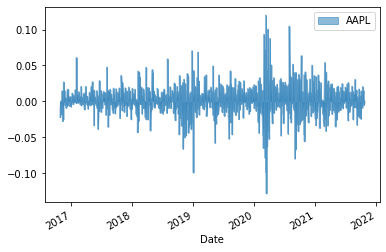

In [9]:
plt.figure()
aapl_df.plot.area(stacked=False)
plt.savefig("aapl_df.png")

## Google Returns

In [10]:
# Drop columns
goog_data.drop(columns=["Volume", "Open", "High", "Low"], inplace=True)
goog_data.head()

,Close/Last
Date,
2016-10-25,$807.67
2016-10-26,$799.07
2016-10-27,$795.35
2016-10-28,$795.37
2016-10-31,$784.54


In [11]:
# Fix data types
goog_data["Close/Last"] = goog_data["Close/Last"].str.replace("$", "")
goog_data["Close/Last"] = goog_data["Close/Last"].astype("float")
goog_data.dtypes

Close/Last    float64
dtype: object

In [12]:
# Calculate daily returns
goog_data = goog_data.pct_change()
goog_data.head()

,Close/Last
Date,
2016-10-25,NaN
2016-10-26,-0.010648
2016-10-27,-0.004655
2016-10-28,0.000025
2016-10-31,-0.013616


In [13]:
# Drop nulls
goog_data.pct_change()
goog_data.dropna(inplace=True)
goog_data.head()

,Close/Last
Date,
2016-10-26,-0.010648
2016-10-27,-0.004655
2016-10-28,0.000025
2016-10-31,-0.013616
2016-11-01,-0.001185


In [14]:
# Rename `Close` Column to be specific to this portfolio
goog_data = goog_data.rename(columns={"Close/Last":"GOOG"})
goog_data.head()

,GOOG
Date,
2016-10-26,-0.010648
2016-10-27,-0.004655
2016-10-28,0.000025
2016-10-31,-0.013616
2016-11-01,-0.001185


<Figure size 432x288 with 0 Axes>

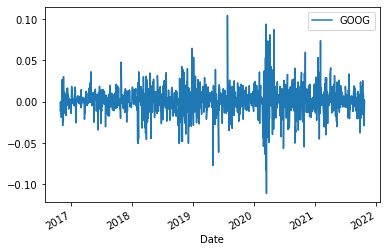

In [15]:
# Plot daily return
plt.figure()
goog_data.plot()
plt.savefig("goog_data.png")

## Telsa Returns

In [16]:
# Drop columns
tsla_data.drop(columns=["Volume", "Open", "High", "Low"], inplace=True)
tsla_data.head()

,Close/Last
Date,
2016-10-26,$40.448
2016-10-27,$40.802
2016-10-28,$39.994
2016-10-31,$39.546
2016-11-01,$38.158


In [17]:
# Fix data types
tsla_data["Close/Last"] = tsla_data["Close/Last"].str.replace("$", "")
tsla_data["Close/Last"] = tsla_data["Close/Last"].astype("float")
tsla_data.dtypes

Close/Last    float64
dtype: object

In [18]:
# Calculate daily returns
tsla_data = tsla_data.pct_change()
tsla_data.head()

,Close/Last
Date,
2016-10-26,NaN
2016-10-27,0.008752
2016-10-28,-0.019803
2016-10-31,-0.011202
2016-11-01,-0.035098


In [19]:
# Drop nulls
tsla_data.pct_change()
tsla_data.dropna(inplace=True)
tsla_data.head()

,Close/Last
Date,
2016-10-27,0.008752
2016-10-28,-0.019803
2016-10-31,-0.011202
2016-11-01,-0.035098
2016-11-02,-0.014519


In [20]:
# Rename `Close` Column to be specific to this portfolio
tsla_data = tsla_data.rename(columns={"Close/Last":"TSLA"})
tsla_data.head()

,TSLA
Date,
2016-10-27,0.008752
2016-10-28,-0.019803
2016-10-31,-0.011202
2016-11-01,-0.035098
2016-11-02,-0.014519


<Figure size 432x288 with 0 Axes>

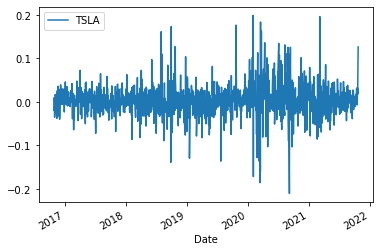

In [21]:
plt.figure()
tsla_data.plot()
plt.savefig('tsla_data.png')

## S&P 500 Index

In [22]:
# Read S&P 500 historical data
data_path = Path("SP500_SP.csv")
sp500_data = pd.read_csv(
    data_path,
    index_col="Date",
    infer_datetime_format=True,
    parse_dates=True
)
sp500_data.sort_index(inplace=True)
# Display sample data
sp500_data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2016-10-26,2134.1,213.0,2134.0,2134.8,2128.5
2016-10-27,2123.4,281.0,2133.6,2143.1,2124.7
2016-10-28,2123.8,290.0,2127.5,2129.0,2116.5
2016-10-31,2120.1,185.0,2122.0,2129.3,2119.0
2016-11-01,2103.8,242.0,2123.0,2128.0,2103.6


In [23]:
# check data type
sp500_data.dtypes

Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

In [24]:
# Drop columns
sp500_data.drop(columns=["Volume", "Open", "High", "Low"], inplace=True)
sp500_data.head()

,Close/Last
Date,
2016-10-26,2134.1
2016-10-27,2123.4
2016-10-28,2123.8
2016-10-31,2120.1
2016-11-01,2103.8


In [25]:
# Calculate daily returns
sp500_data = sp500_data.pct_change()
sp500_data.head()

,Close/Last
Date,
2016-10-26,NaN
2016-10-27,-0.005014
2016-10-28,0.000188
2016-10-31,-0.001742
2016-11-01,-0.007688


In [26]:
# Drop nulls
sp500_data.pct_change()
sp500_data.dropna(inplace=True)
sp500_data.head()

,Close/Last
Date,
2016-10-27,-0.005014
2016-10-28,0.000188
2016-10-31,-0.001742
2016-11-01,-0.007688
2016-11-02,-0.005466


In [27]:
# Rename `Close` Column to be specific to this portfolio
sp500_data = sp500_data.rename(columns={"Close/Last":"SP500"})
sp500_data.head()

,SP500
Date,
2016-10-27,-0.005014
2016-10-28,0.000188
2016-10-31,-0.001742
2016-11-01,-0.007688
2016-11-02,-0.005466


<Figure size 432x288 with 0 Axes>

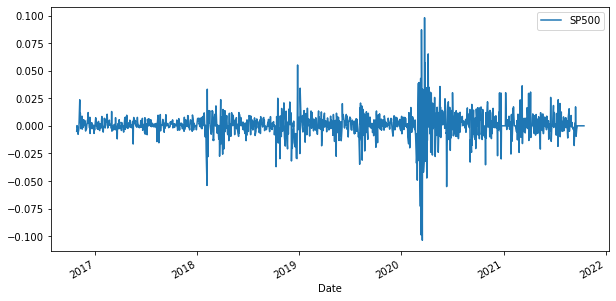

In [28]:
plt.figure()
sp500_data.plot(figsize=(10,5))
plt.savefig('sp500.png')

## Combine AAPL, GOOG, TSLA and S&P 500 Returns

In [29]:
combined_data_df = pd.concat([aapl_df, goog_data, tsla_data], axis="columns")
combined_data_df.dropna()
combined_data_df.head()

,AAPL,GOOG,TSLA
Date,,,
2016-10-26,-0.022327,-0.010648,NaN
2016-10-27,-0.009689,-0.004655,0.008752
2016-10-28,-0.006639,0.000025,-0.019803
2016-10-31,-0.001407,-0.013616,-0.011202
2016-11-01,-0.018316,-0.001185,-0.035098


### Portfolio Returns

In [30]:
portfolio_returns_std = combined_data_df.std()
portfolio_returns_std

AAPL    0.019049
GOOG    0.016926
TSLA    0.037462
dtype: float64

In [31]:
# Calculate portfolio returns with an equal amount of each stock
weights = [0.6, 0.3, 0.2]
portfolio_returns = combined_data_df.dot(weights)
portfolio_returns.head()

Date
2016-10-26         NaN
2016-10-27   -0.005459
2016-10-28   -0.007936
2016-10-31   -0.007169
2016-11-01   -0.018365
dtype: float64

## Risk Management

In [32]:
# Calcualte volatility using standard deviation * adj caledar
volatility = combined_data_df.std() * np.sqrt(252)
volatility

AAPL    0.302400
GOOG    0.268690
TSLA    0.594697
dtype: float64

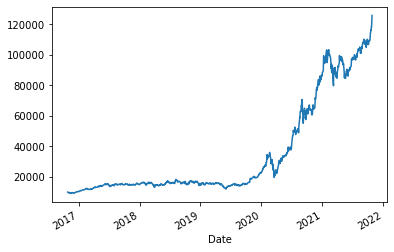

In [33]:
# Higher Volalitity Portfolio (More risk, but potentially higher returns)
initial_investment = 10000
weights = [0.25, 0.25, 0.50]
portfolio_returns = combined_data_df.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod() 
(initial_investment * cumulative_returns).plot()
plt.savefig('high_vol.png')

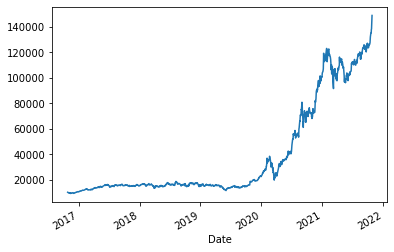

In [34]:
# Lower Volalitity Portfolio (Less risk, but potentially lower returns)
initial_investment = 10000
weights = [0.2, 0.2, 0.6]
portfolio_returns = combined_data_df.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot()
plt.savefig('low_vol.png')

In [35]:
# Calculate Sharpe Ratio
sharpe_ratio = (combined_data_df.mean() * 252) / (portfolio_returns_std * np.sqrt(252))
sharpe_ratio.head()

AAPL    1.221856
GOOG    1.055126
TSLA    1.386543
dtype: float64

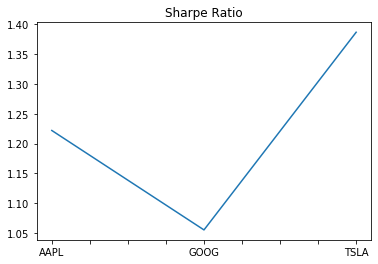

In [36]:
# Visualize data in plot
sharpe_ratio.plot(title="Sharpe Ratio")
plt.savefig('sharpe_ratio.png')